# Content and Objectives

- Show different properties of OFDM
- BPSK symbols are input to OFDM
- Illustration of: carriers in time domain, resulting OFDM signal, and PAPR

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=matplotlib.checkdep_usetex(True))

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# NOTE: N_ofdm is number of carriers
# --> could be changed for illustration

# number of symbols per OFDM symbol   
N_ofdm = 4

In [4]:
# modulation scheme and constellation points
constellation_points = [ -1 , 1]

# set symbol time
T_symb = 1.0 

# OFDM symbol time
T_ofdm = T_symb * N_ofdm

T_sample = 0.01       
t = np.arange( 0, T_ofdm, T_sample )

# setting zero-padding and vector of frequency
N_zp = 29

delta_f = 1.0 / T_ofdm
f = np.linspace( -1 / ( 2 * T_sample ), 1 / ( 2 * T_sample ), ( N_zp + 1 ) * np.size( t ) ) 

# Show OFDM carriers in time domain

/home/jaekel/.anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


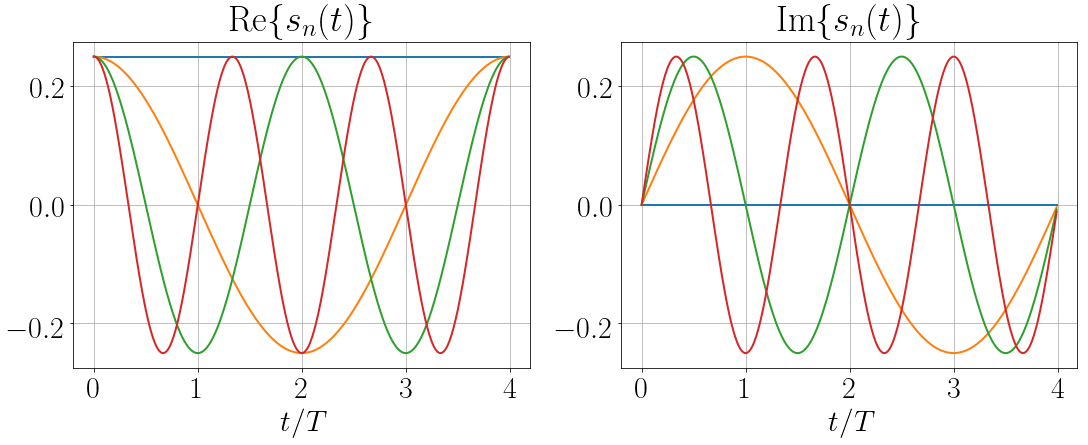

In [5]:
# loop carriers and plotting them
for _n in np.arange( N_ofdm ):

    s =  1 / N_ofdm * np.exp( 1j * 2 * np.pi * _n * delta_f * t )

    plt.figure(1)
    
    plt.subplot(121)
    plt.plot( t, np.real( s ), linewidth = 2.0 )

    plt.grid(True)
    plt.xlabel('$t/T$')
    plt.title('$\mathrm{Re}\{s_n(t)\}$')

    plt.subplot(122)
    plt.plot( t, np.imag( s ), linewidth = 2.0 )

    plt.grid(True)
    plt.xlabel('$t/T$')
    plt.title('$\mathrm{Im}\{s_n(t)\}$')


# Generate OFDM signal

In [6]:
# NOTE: All carriers are simply being summed up;
# no modulation is used in this example
# add the according lines if you like to

# initialized array of frequency carriers
S = np.zeros( ( N_ofdm, np.size( f ) ), dtype=complex )   
    
# generate OFDM symbol
for _n in np.arange( N_ofdm ):

    s = 1 / N_ofdm * np.exp( 1j * 2 * np.pi * _n * delta_f * t ) 

    S[ _n, : ]  = np.fft.fftshift( np.fft.fft( np.append( s , np.zeros( N_zp * np.size( t ) ) ) ) )
    S[ _n, : ] /= np.max( np.abs( S[ _n, : ] ) )
    
# get sum spectrum    
S_PSD_sum = np.sum( np.abs( S )**2, axis=0 )
S_PSD_sum /= np.max( S_PSD_sum)     

# Plotting Frequency Regime

(-0.5, 1.5)

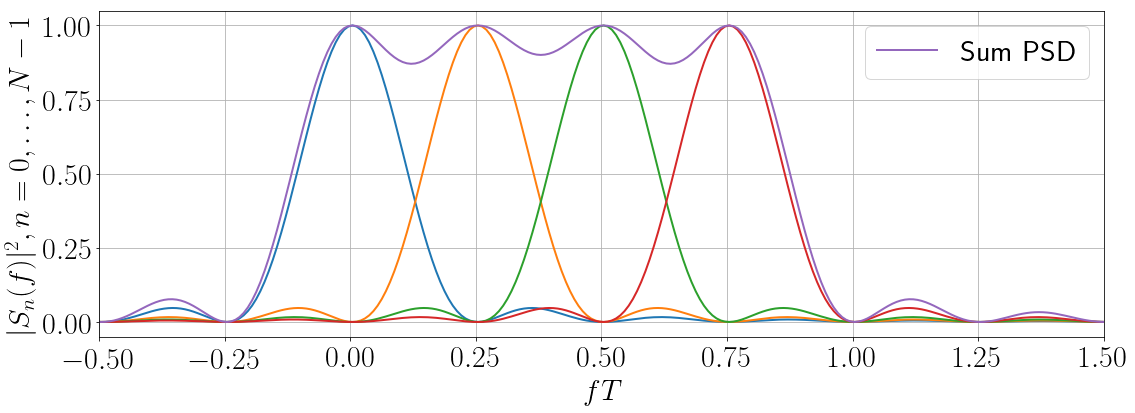

In [7]:
# NOTE: Signal is generated by letting the first carrier equalling zero
# Practically, carriers would be symmetrical to zero frequency

# plotting OFDM symbols
for _n in np.arange( N_ofdm ):
    plt.plot( f, np.abs( S[ _n, : ])**2 , linewidth = 2.0 ) 

plt.plot(f, S_PSD_sum, linewidth = 2.0, label='Sum PSD' )

plt.grid( True )
plt.xlabel('$fT$')
plt.ylabel('$|S_n(f)|^2, n=0, \\ldots, N-1$')
plt.legend( loc = 'upper right')

plt.xlim( ( - 1 / T_symb / 2, 1 / T_symb * 1.5) ) 

# Generate Data Modulated OFDM Signal and Show Signal in Time and PAPR

Text(0.5,1,'$P_{\\max}$ = 0.29, $P_{\\mathrm{av}}$=0.06')

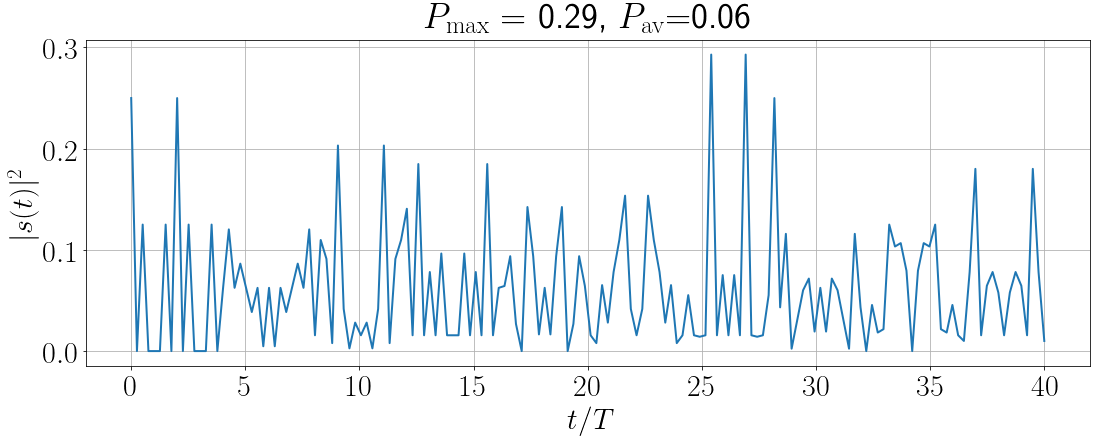

In [8]:
# define number of carriers and of OFDM symbols
N_ofdm = 16
N_syms =10

# generate random binary vector and modulate the specified modulation scheme
data = np.random.randint( 2, size = N_ofdm * N_syms )
syms = [ constellation_points[ d ] for d in data ]

# initialize Tx signal
s = np.zeros( N_syms * N_ofdm, dtype='complex' )    

# loop for OFDM symbols
for ind_syms in np.arange( N_syms ) :

    # generate OFDM symbol            
    s[ ind_syms * N_ofdm : ( ind_syms + 1 ) * N_ofdm ] = \
        np.fft.ifft( syms[ ind_syms * N_ofdm : ( ind_syms + 1 ) * N_ofdm ] )


# plotting    
plt.figure()

plt.plot( np.linspace(0, N_syms * T_ofdm, np.size(s)), np.abs( s )**2 , linewidth=2.0 )  
plt.grid( True )

plt.xlabel('$t/T$')
plt.ylabel('$|s(t)|^2$')

P_peak = np.max( np.abs( s )**2 )
P_av = np.average( np.abs( s )**2 )
plt.title(r'$P_{{\max}}$ = {:2.2f}, $P_{{\mathrm{{av}}}}$={:2.2f}'.format( P_peak, P_av) )
